In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Define paths
train_dir = r'C:\Users\shashi\Downloads\seg_train\seg_train'
test_dir = r'C:\Users\shashi\Downloads\seg_test\seg_test'

In [15]:
# Load training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    label_mode='int',  # Labels are integers
    shuffle=True
)

Found 14034 files belonging to 6 classes.


In [17]:
# Load test dataset
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode='int',
    shuffle=False
)

Found 3000 files belonging to 6 classes.


In [19]:
# Extract class names
class_names = train_dataset.class_names
print("Class names:", class_names)

Class names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [21]:
# Normalize pixel values to [0, 1]
def normalize(image, label):
    return image / 255.0, label

In [23]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [25]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

C:\Users\shashi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 310s 693ms/step - accuracy: 0.5271 - loss: 1.2254 - val_accuracy: 0.6667 - val_loss: 0.8839
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 269s 613ms/step - accuracy: 0.7386 - loss: 0.7066 - val_accuracy: 0.7143 - val_loss: 0.7425
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 275s 626ms/step - accuracy: 0.7986 - loss: 0.5551 - val_accuracy: 0.7907 - val_loss: 0.5683
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 267s 609ms/step - accuracy: 0.8606 - loss: 0.4023 - val_accuracy: 0.7977 - val_loss: 0.5828
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 288s 656ms/step - accuracy: 0.8964 - loss: 0.2894 - val_accuracy: 0.8153 - val_loss: 0.6361
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 262s 595ms/step - accuracy: 0.9293 - loss: 0.2019 - val_accuracy: 0.7903 - val_loss: 0.7914
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 281s 640ms/step - accuracy: 0.9556 - loss: 0.1334 - val_accuracy: 0.7990 - val_loss: 0.8672
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 290s 661ms/step - accuracy: 0.9679 -

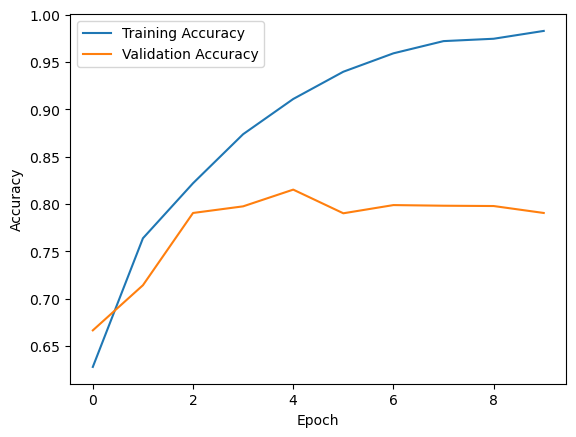

In [31]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.7766 - loss: 1.2639
Test Accuracy: 0.7907


In [35]:
# Save the model
model.save('intel_image_classification_model.keras')

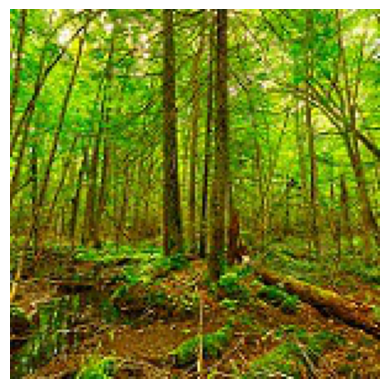

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
Predicted class: forest


In [37]:
from tensorflow.keras.preprocessing import image

# Load a single image for prediction
img_path = r'C:\Users\shashi\Downloads\seg_pred\seg_pred/8926.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

plt.imshow(img)
plt.axis('off')  
plt.show()

# Make prediction
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
print(f"Predicted class: {predicted_class}")

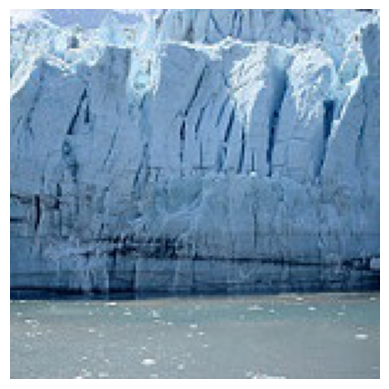

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted class: glacier


In [39]:
# Load a single image for prediction
img_path = r'C:\Users\shashi\Downloads\seg_pred\seg_pred/8681.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

plt.imshow(img)
plt.axis('off')  
plt.show()

# Make prediction
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
print(f"Predicted class: {predicted_class}")

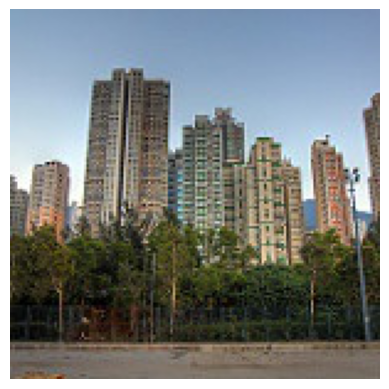

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted class: buildings


In [41]:
# Load a single image for prediction
img_path = r'C:\Users\shashi\Downloads\seg_pred\seg_pred/8710.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

plt.imshow(img)
plt.axis('off')  
plt.show()

# Make prediction
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
print(f"Predicted class: {predicted_class}")

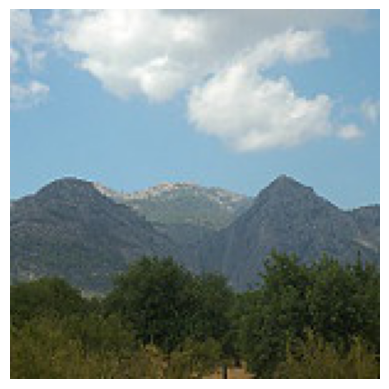

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted class: mountain


In [43]:
from tensorflow.keras.preprocessing import image

# Load a single image for prediction
img_path = r'C:\Users\shashi\Downloads\seg_pred\seg_pred/24003.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

plt.imshow(img)
plt.axis('off')  
plt.show()

# Make prediction
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
print(f"Predicted class: {predicted_class}")